In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# For notebook plotting style
sns.set(style="whitegrid")

In [2]:
#  Load Dataset
file_path = "study.csv" 
df = pd.read_csv(file_path)

In [3]:
df.head()  # Display the first few rows of the dataset

,29/4/23,gender\nstudent's sex (binary: 'F' - female or 'M' - male),age\nstudent's age (numeric: from 15 to 22),adress\nstudent's home address type (binary: 'U' - urban or 'R' - rural),famsize\nfamily size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3),Pstatus\nparent's cohabitation status (binary: 'T' - living together or 'A' - apart),M_Education,F_education,"Mjob\nmother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or other","Fjob\nfather's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or other",relationship_breakdown,smoker,avarage_tution_fee_cost,time_spent_with_friends,ssc_result,hsc_result
0,29/4/23,M,23,U,GT3,T,2,3,other,other,yes,No,400000,4,4.39,4.33
1,29/4/23,M,22,U,GT3,T,3,4,at_home,other,yes,yes,400000,2,4.20,4.17
2,29/4/23,M,24,R,GT3,T,1,3,at_home,teacher,yes,yes,293000,3,3.92,4.17
3,29/4/23,F,22,U,GT3,T,3,4,at_home,other,No,No,293000,8,5.00,5.00
4,29/4/23,M,23,U,GT3,T,4,4,teacher,other,No,No,295000,8,4.92,4.70


In [4]:
df.columns = [
    "date",
    "gender",
    "age",
    "address",
    "famsize",
    "pstatus",
    "M_education",
    "F_education",
    "Mjob",
    "Fjob",
    "relationship_breakdown",
    "smoker",
    "average_tuition_fee",
    "time_spent_with_friends",
    "SSC_result",
    "HSC_result"
]

In [5]:
df.head()

,date,gender,age,address,famsize,pstatus,M_education,F_education,Mjob,Fjob,relationship_breakdown,smoker,average_tuition_fee,time_spent_with_friends,SSC_result,HSC_result
0,29/4/23,M,23,U,GT3,T,2,3,other,other,yes,No,400000,4,4.39,4.33
1,29/4/23,M,22,U,GT3,T,3,4,at_home,other,yes,yes,400000,2,4.20,4.17
2,29/4/23,M,24,R,GT3,T,1,3,at_home,teacher,yes,yes,293000,3,3.92,4.17
3,29/4/23,F,22,U,GT3,T,3,4,at_home,other,No,No,293000,8,5.00,5.00
4,29/4/23,M,23,U,GT3,T,4,4,teacher,other,No,No,295000,8,4.92,4.70


In [6]:
# Drop date column
df.drop(columns=["date"], inplace=True)

In [7]:
df.head()  # Display the first few rows of the dataset

,gender,age,address,famsize,pstatus,M_education,F_education,Mjob,Fjob,relationship_breakdown,smoker,average_tuition_fee,time_spent_with_friends,SSC_result,HSC_result
0,M,23,U,GT3,T,2,3,other,other,yes,No,400000,4,4.39,4.33
1,M,22,U,GT3,T,3,4,at_home,other,yes,yes,400000,2,4.20,4.17
2,M,24,R,GT3,T,1,3,at_home,teacher,yes,yes,293000,3,3.92,4.17
3,F,22,U,GT3,T,3,4,at_home,other,No,No,293000,8,5.00,5.00
4,M,23,U,GT3,T,4,4,teacher,other,No,No,295000,8,4.92,4.70


/opt/anaconda3/envs/CSE445_env/lib/python3.13/site-packages/scipy/_lib/_util.py:1272: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/anaconda3/envs/CSE445_env/lib/python3.13/site-packages/scipy/_lib/_util.py:1272: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/anaconda3/envs/CSE445_env/lib/python3.13/site-packages/scipy/_lib/_util.py:1272: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)


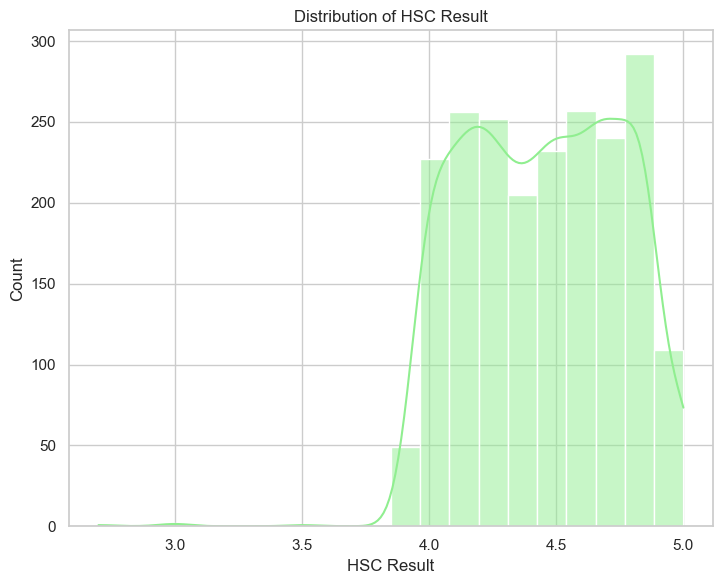

In [8]:
# Step 4: Visualize SSC and HSC Result Distributions
plt.figure(figsize=(14, 6))

# HSC result distribution
plt.subplot(1, 2, 2)
sns.histplot(df["HSC_result"], kde=True, bins=20, color="lightgreen")
plt.title("Distribution of HSC Result")
plt.xlabel("HSC Result")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [9]:
# Convert binary nominal features to numeric

# Define mappings
binary_mappings = {
    'gender': {'M': 1, 'F': 0},
    'address': {'U': 1, 'R': 0},
    'famsize': {'GT3': 1, 'LE3': 0},
    'pstatus': {'T': 1, 'A': 0},
    'relationship_breakdown': {'yes': 1, 'No': 0},
    'smoker': {'yes': 1, 'No': 0}
}

# Apply mappings
for column, mapping in binary_mappings.items():
    df[column] = df[column].map(mapping)

# Preview converted columns
display(df[['gender', 'address', 'famsize', 'pstatus', 'relationship_breakdown', 'smoker']].head())


,gender,address,famsize,pstatus,relationship_breakdown,smoker
0,1,1,1,1.0,1.0,0.0
1,1,1,1,1.0,1.0,1.0
2,1,0,1,1.0,1.0,1.0
3,0,1,1,1.0,0.0,0.0
4,1,1,1,1.0,0.0,0.0


In [10]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Strip whitespaces
df['Mjob'] = df['Mjob'].str.strip()
df['Fjob'] = df['Fjob'].str.strip()

# Step 2: Encode as integer labels
le_mjob = LabelEncoder()
le_fjob = LabelEncoder()

df['Mjob_cat'] = le_mjob.fit_transform(df['Mjob'])
df['Fjob_cat'] = le_fjob.fit_transform(df['Fjob'])

# Step 3: Drop original string columns
df.drop(['Mjob', 'Fjob'], axis=1, inplace=True)

In [11]:
# Confirm integer dtypes and preview
display(df.head())

,gender,age,address,famsize,pstatus,M_education,F_education,relationship_breakdown,smoker,average_tuition_fee,time_spent_with_friends,SSC_result,HSC_result,Mjob_cat,Fjob_cat
0,1,23,1,1,1.0,2,3,1.0,0.0,400000,4,4.39,4.33,2,2
1,1,22,1,1,1.0,3,4,1.0,1.0,400000,2,4.20,4.17,0,2
2,1,24,0,1,1.0,1,3,1.0,1.0,293000,3,3.92,4.17,0,4
3,0,22,1,1,1.0,3,4,0.0,0.0,293000,8,5.00,5.00,0,2
4,1,23,1,1,1.0,4,4,0.0,0.0,295000,8,4.92,4.70,4,2


In [12]:
# ===== Feature Engineering =====

# 1. Average Parental Education
df['avg_parent_edu'] = (df['M_education'] + df['F_education']) / 2

# 2. SSC × Parental Education Interaction
df['ssc_parentedu_interaction'] = df['SSC_result'] * df['avg_parent_edu']

# 3. Combined Social Interaction Score
df['social_combined'] = df['time_spent_with_friends'] * (1 - df['relationship_breakdown']) * (1 - df['smoker'])

# 4. Binary Risk Flags
df['low_ssc_flag'] = (df['SSC_result'] < 3.0).astype(int)
df['low_parentedu_flag'] = (df['avg_parent_edu'] < 2).astype(int)
df['unstable_env_flag'] = ((df['relationship_breakdown'] == 1) | (df['smoker'] == 1)).astype(int)

# 5. Family Education Imbalance
df['edu_imbalance'] = abs(df['M_education'] - df['F_education'])

# 6. Social Index Score
df['social_index'] = (
    0.3 * df['time_spent_with_friends'] -
    0.4 * df['relationship_breakdown'] -
    0.3 * df['smoker']
)

# 7. SSC Efficiency
df['ssc_time_efficiency'] = df['SSC_result'] / (df['time_spent_with_friends'] + 1)

# 8. Drop Weak or Redundant Features
df.drop(['pstatus', 'address', 'Mjob_cat', 'Fjob_cat'], axis=1, inplace=True)


In [13]:
from sklearn.model_selection import train_test_split

# Drop 'age' from features and define target as HSC_result
X = df.drop(columns=['age','HSC_result'])
y = df['HSC_result']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1698, 18)
X_test shape: (425, 18)
y_train shape: (1698,)
y_test shape: (425,)


In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Step 1: Impute missing values using mean strategy
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

# Step 2: Scale only selected columns
scale_vars = ['average_tuition_fee', 'time_spent_with_friends']

scaler = MinMaxScaler()
# Apply scaling to selected columns
X_train_imputed[scale_vars] = scaler.fit_transform(X_train_imputed[scale_vars])
X_test_imputed[scale_vars] = scaler.transform(X_test_imputed[scale_vars])

# Final scaled data
X_train_scaled = X_train_imputed
X_test_scaled = X_test_imputed

# Preview
X_train_scaled[scale_vars].head()


,average_tuition_fee,time_spent_with_friends
583,0.000000,0.125
2088,0.157895,1.000
351,0.368421,0.625
1822,0.052632,0.375
1499,0.210526,0.125


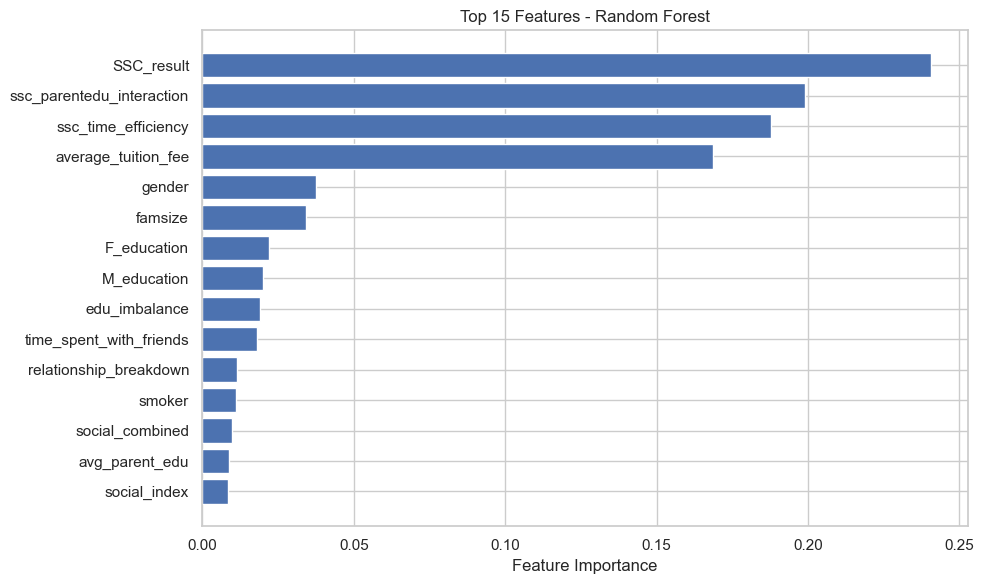

In [15]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Fit RandomForest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)

# Create a DataFrame of feature importances
rf_importances = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
plt.barh(rf_importances['Feature'][:15][::-1], rf_importances['Importance'][:15][::-1])
plt.xlabel('Feature Importance')
plt.title('Top 15 Features - Random Forest')
plt.tight_layout()
plt.show()


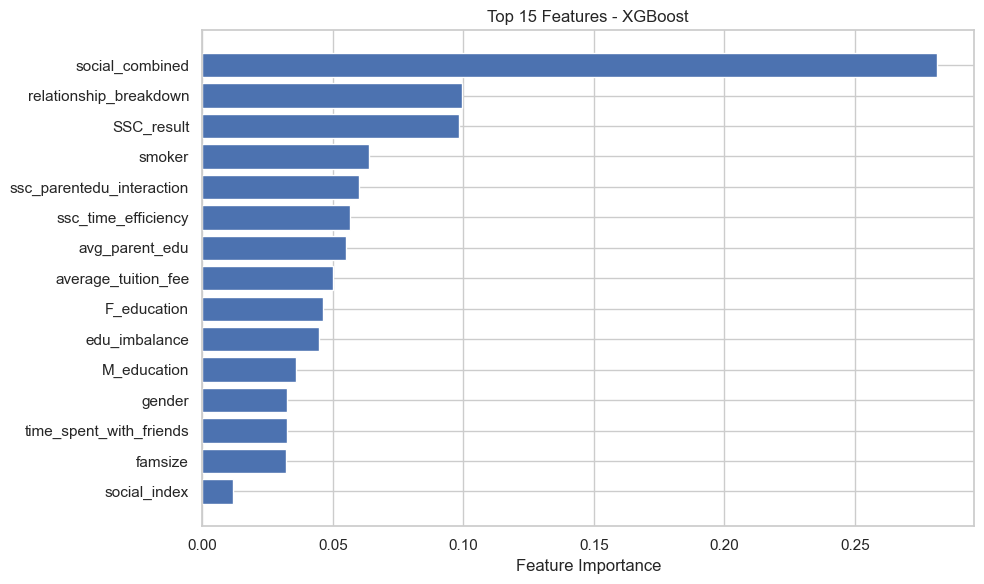

In [16]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, objective='reg:squarederror', random_state=42)
xgb.fit(X_train_imputed, y_train)

xgb_importances = pd.DataFrame({
    'Feature': X_train_imputed.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
plt.barh(xgb_importances['Feature'][:15][::-1], xgb_importances['Importance'][:15][::-1])
plt.xlabel('Feature Importance')
plt.title('Top 15 Features - XGBoost')
plt.tight_layout()
plt.show()


In [17]:
import optuna
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

def evaluate_tree_models_optuna(train_X, train_y, test_X, test_y, feature_set_name="All Features", n_trials=50, n_splits=5):
    print(f"\nEvaluating with: {feature_set_name}")
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    results = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2 Score'])
    best_models = {}

    # --- Random Forest ---
    def objective_rf(trial):
        model = RandomForestRegressor(
            n_estimators=trial.suggest_int("n_estimators", 200, 600),
            max_depth=trial.suggest_int("max_depth", 10, 40),
            min_samples_split=trial.suggest_int("min_samples_split", 2, 10),
            min_samples_leaf=trial.suggest_int("min_samples_leaf", 1, 5),
            max_features=trial.suggest_categorical("max_features", ['sqrt', 'log2', None]),
            bootstrap=True,
            random_state=42
        )
        return cross_val_score(model, train_X, train_y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1).mean()

    study_rf = optuna.create_study(direction="maximize")
    study_rf.optimize(objective_rf, n_trials=n_trials)
    best_models['Random Forest'] = RandomForestRegressor(**study_rf.best_params, random_state=42)

    # --- AdaBoost ---
    def objective_ab(trial):
        base_est = DecisionTreeRegressor(
            max_depth=trial.suggest_int("base_max_depth", 5, 15),
            min_samples_split=trial.suggest_int("base_min_samples_split", 2, 10),
            min_samples_leaf=trial.suggest_int("base_min_samples_leaf", 1, 5)
        )
        model = AdaBoostRegressor(
            estimator=base_est,
            n_estimators=trial.suggest_int("n_estimators", 100, 600),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 1.0),
            loss=trial.suggest_categorical("loss", ['linear', 'square', 'exponential']),
            random_state=42
        )
        return cross_val_score(model, train_X, train_y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1).mean()

    study_ab = optuna.create_study(direction="maximize")
    study_ab.optimize(objective_ab, n_trials=n_trials)


    ab_params = study_ab.best_params.copy()
    base_best_ab = DecisionTreeRegressor(
        max_depth=ab_params.pop("base_max_depth"),
        min_samples_split=ab_params.pop("base_min_samples_split"),
        min_samples_leaf=ab_params.pop("base_min_samples_leaf")
    )
    best_models['AdaBoost'] = AdaBoostRegressor(estimator=base_best_ab, **ab_params, random_state=42)


    # --- XGBoost ---
    def objective_xgb(trial):
        model = XGBRegressor(
            n_estimators=trial.suggest_int("n_estimators", 200, 800),
            max_depth=trial.suggest_int("max_depth", 6, 20),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
            subsample=trial.suggest_float("subsample", 0.7, 1.0),
            colsample_bytree=trial.suggest_float("colsample_bytree", 0.7, 1.0),
            gamma=trial.suggest_float("gamma", 0, 5),
            reg_alpha=trial.suggest_float("reg_alpha", 0, 1.0),
            reg_lambda=trial.suggest_float("reg_lambda", 0, 1.0),
            objective='reg:squarederror',
            random_state=42,
            verbosity=0,
            n_jobs=-1
        )
        return cross_val_score(model, train_X, train_y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1).mean()

    study_xgb = optuna.create_study(direction="maximize")
    study_xgb.optimize(objective_xgb, n_trials=n_trials)

    best_models['XGBoost'] = XGBRegressor(**study_xgb.best_params, objective='reg:squarederror', random_state=42, verbosity=0)

    # --- Evaluation ---
    for name, model in best_models.items():
        model.fit(train_X, train_y)
        predictions = model.predict(test_X)

        mse = mean_squared_error(test_y, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(test_y, predictions)
        r2 = r2_score(test_y, predictions)

        results.loc[name] = [mse, rmse, mae, r2]

    return results, best_models
    


/opt/anaconda3/envs/CSE445_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

results, best_models = evaluate_tree_models_optuna(
    train_X=X_train_imputed,
    train_y=y_train,
    test_X=X_test_imputed,
    test_y=y_test,
    feature_set_name="All Features",
    n_trials=50,
    n_splits=5
)

print(results)

[I 2025-08-07 02:38:24,740] A new study created in memory with name: no-name-a8a4a3b3-6055-4f9c-928c-6cef3d2b3638



Evaluating with: All Features


[I 2025-08-07 02:38:27,119] Trial 0 finished with value: -0.085955832052283 and parameters: {'n_estimators': 349, 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: -0.085955832052283.
[I 2025-08-07 02:38:28,313] Trial 1 finished with value: -0.0852907612886566 and parameters: {'n_estimators': 423, 'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 1 with value: -0.0852907612886566.
[I 2025-08-07 02:38:29,675] Trial 2 finished with value: -0.0876453094539347 and parameters: {'n_estimators': 243, 'max_depth': 33, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 1 with value: -0.0852907612886566.
[I 2025-08-07 02:38:30,765] Trial 3 finished with value: -0.08707502736587891 and parameters: {'n_estimators': 347, 'max_depth': 33, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 1 with value: -0.08529076

                    MSE      RMSE       MAE  R2 Score
Random Forest  0.080982  0.284573  0.249204  0.120965
AdaBoost       0.082736  0.287638  0.251230  0.101927
XGBoost        0.082953  0.288015  0.253493  0.099573


In [ ]:
pip install numpy==2.2.0

In [19]:
import matplotlib.pyplot as plt
import shap
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np

# Store best_models externally for use in diagnostics
external_best_models = {}

# 1. R² Comparison: Train vs Test
def plot_train_vs_test_r2(best_models, X_train, y_train, X_test, y_test):
    train_r2_scores = []
    test_r2_scores = []
    model_names = []

    for name, model in best_models.items():
        model.fit(X_train, y_train)
        train_r2 = model.score(X_train, y_train)
        test_r2 = model.score(X_test, y_test)

        train_r2_scores.append(train_r2)
        test_r2_scores.append(test_r2)
        model_names.append(name)

        print(f"{name}:\n  Train R²: {train_r2:.4f}\n  Test R²: {test_r2:.4f}\n")

    x = np.arange(len(model_names))
    width = 0.35

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(x - width/2, train_r2_scores, width, label='Train R²')
    ax.bar(x + width/2, test_r2_scores, width, label='Test R²')

    ax.set_ylabel('R² Score')
    ax.set_title('Train vs Test R² by Model')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names)
    ax.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


# 2. SHAP Plot
def plot_shap_summary(model, X, model_name="Model"):
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)

    print(f"SHAP Summary Plot for {model_name}:")
    shap.summary_plot(shap_values, X, plot_type="bar")


# 3. Permutation Importance Plot
def plot_permutation_importance(model, X, y, model_name="Model"):
    result = permutation_importance(model, X, y, scoring='r2', n_repeats=10, random_state=42, n_jobs=-1)
    sorted_idx = result.importances_mean.argsort()[::-1]

    plt.figure(figsize=(8, 5))
    plt.barh(np.array(X.columns)[sorted_idx][:15], result.importances_mean[sorted_idx][:15])
    plt.xlabel("Mean Importance")
    plt.title(f"Top 15 Features by Permutation Importance ({model_name})")
    plt.gca().invert_yaxis()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


Random Forest:
  Train R²: 0.2831
  Test R²: 0.1210

AdaBoost:
  Train R²: 0.2002
  Test R²: 0.1002

XGBoost:
  Train R²: 0.1712
  Test R²: 0.0996



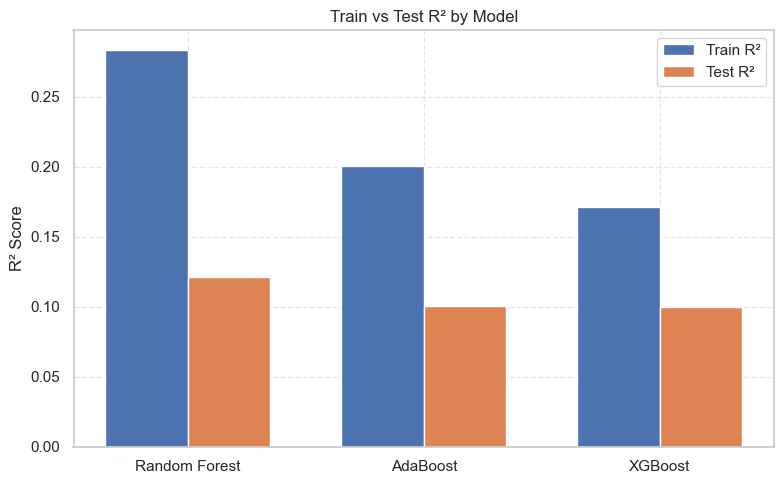

In [20]:
plot_train_vs_test_r2(best_models, X_train_scaled, y_train, X_test_scaled, y_test)


 Top correlated features with HSC_result:
 HSC_result                   1.000000
SSC_result                   0.157353
ssc_parentedu_interaction    0.088039
F_education                  0.087977
famsize                      0.046635
low_parentedu_flag           0.041547
avg_parent_edu               0.041134
ssc_time_efficiency          0.036143
gender                       0.019465
unstable_env_flag            0.013169
Name: HSC_result, dtype: float64

 Least correlated features:
 unstable_env_flag          0.013169
time_spent_with_friends    0.003658
average_tuition_fee       -0.016705
M_education               -0.028011
edu_imbalance             -0.030414
smoker                    -0.056129
relationship_breakdown    -0.071718
social_combined           -0.081455
social_index              -0.084243
low_ssc_flag              -0.116056
Name: HSC_result, dtype: float64


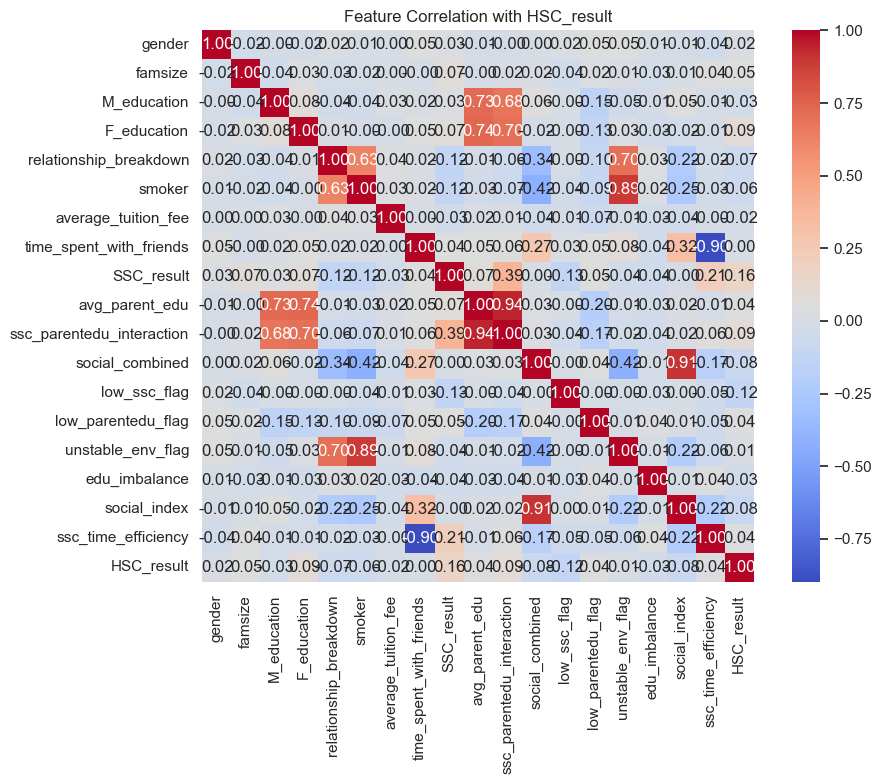

Exception ignored in: <function ResourceTracker.__del__ at 0x1073bb240>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CSE445_env/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/envs/CSE445_env/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/envs/CSE445_env/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104bcb240>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CSE445_env/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/envs/CSE445_env/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/envs/CSE445_env/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exceptio

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Include HSC_result in the analysis
df_corr = X_train_scaled.copy()
df_corr['HSC_result'] = y_train

# Compute correlation
corr_matrix = df_corr.corr()

# Sort by HSC_result
sorted_corr = corr_matrix['HSC_result'].sort_values(ascending=False)

# Print top and bottom correlations
print(" Top correlated features with HSC_result:\n", sorted_corr.head(10))
print("\n Least correlated features:\n", sorted_corr.tail(10))

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation with HSC_result")
plt.tight_layout()
plt.show()
